# ASSIGNMENT 2 : Team 8

## `Assumptions`

* Based in the _USA_ according to all the given county, state and city names. Assuming it's the ONLY country's data

* __VIN__ stands for __Vehicle Identification Number__ and its purpose is to uniquely identify each vehicle in the country (just like a Number Plate). _DOL Vehicle ID_ stands for Department of Licensing Vehicle ID and again, seems that the purpose of it is also to uniquely ID each vehicle in the country

* Although, on checking, VIN is not unique for all the rows while DOL is unique for all rows. Thus, dropping DOLVID as there is no usecase for it since unique for all rows

## `All Imports`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr, f_oneway
from IPython.display import display

## `Loading & Pre-processing Dataset`

In [3]:
MAIN_DATA = pd.read_csv("Electric_Vehicle_Data.csv")

# Total Rows & Rows with NaN (even single one of it)
print("Total rows:", len(MAIN_DATA))
print("Rows with NaN:", len(MAIN_DATA[MAIN_DATA.isnull().any(axis=1)]))
print(
    "\nThus, simply dropping all the rows with even a single NaN value as its almost a negligible number compared to total rows!"
)

# Dropping rows with NaN (even single one of it amongst the columns)
MAIN_DATA = MAIN_DATA.dropna()

# Printing all the total rows now
print("\nTotal rows Now:", len(MAIN_DATA))

# Total unique DOL Vehicle ID
print("Total unique DOL Vehicle ID:", len(MAIN_DATA["DOL Vehicle ID"].unique()))

# Dropping DOLVID column
print(
    "Dropping DOL Vehicle ID column as its unique for all rows (no generalisation possible)!"
)

# Dropping DOLVID as its of no use (unique for all so cant generalise)
MAIN_DATA.drop(columns=["DOL Vehicle ID"], inplace=True)

Total rows: 181458
Rows with NaN: 403

Thus, simply dropping all the rows with even a single NaN value as its almost a negligible number compared to total rows!

Total rows Now: 181055
Total unique DOL Vehicle ID: 181055
Dropping DOL Vehicle ID column as its unique for all rows (no generalisation possible)!


## `Unique Values (for all columns)`

In [4]:
# Renaming the VIN column
MAIN_DATA.rename(columns={"VIN (1-10)": "VIN"}, inplace=True)

# Total unique values for each of the column
print("\nTotal unique values for each of the column:")
for col in MAIN_DATA.columns:
    print(col, ":", len(MAIN_DATA[col].unique()))


Total unique values for each of the column:
VIN : 11055
County : 39
City : 468
State : 1
Postal Code : 542
Model Year : 22
Make : 40
Model : 143
Electric Vehicle Type : 2
Clean Alternative Fuel Vehicle (CAFV) Eligibility : 3
Electric Range : 103
Base MSRP : 31
Legislative District : 49
Vehicle Location : 542
Electric Utility : 75
2020 Census Tract : 1767


## `Dropping columns`

In [5]:
print("\nBelow are the columns that are dropped in the pre-processing part:")

# Removing State as there is ONLY one State unique value
print("-> Removing State as there is ONLY one State unique value!")
MAIN_DATA.drop(columns=["State"], inplace=True)

# Dropping Postal code as its redundant
print("-> Dropping Postal code as its redundant!")
MAIN_DATA.drop(columns=["Postal Code"], inplace=True)

# Dropping Legislative District
print("-> Dropping Legislative District as its not helping in any kind of data generalisation!")
MAIN_DATA.drop(columns=["Legislative District"], inplace=True)

# Dropping Latitude Longitude data as its of no use (redundant)
print("-> Dropping Latitude Longitude data as its of no use (redundant & not generalisable)!")
MAIN_DATA.drop(columns=["Vehicle Location"], inplace=True)


Below are the columns that are dropped in the pre-processing part:
-> Removing State as there is ONLY one State unique value!
-> Dropping Postal code as its redundant!
-> Dropping Legislative District as its not helping in any kind of data generalisation!
-> Dropping Latitude Longitude data as its of no use (redundant & not generalisable)!


## `Co-Relation b/w City, County & State`

In [6]:
print("\nCount of each of the unique cities:")
print(MAIN_DATA["City"].value_counts())

print("\nCount of each of the unique counties:")
print(MAIN_DATA["County"].value_counts())


Count of each of the unique cities:
City
Seattle      30045
Bellevue      9116
Redmond       6568
Vancouver     6329
Bothell       5961
             ...  
Gifford          1
Startup          1
Glenwood         1
Adna             1
Maryhill         1
Name: count, Length: 468, dtype: int64

Count of each of the unique counties:
County
King            94460
Snohomish       21439
Pierce          14043
Clark           10667
Thurston         6600
Kitsap           5956
Spokane          4671
Whatcom          4331
Benton           2183
Skagit           1968
Island           1921
Clallam          1079
Chelan           1078
Yakima           1034
Jefferson         994
San Juan          947
Cowlitz           935
Mason             840
Lewis             767
Grays Harbor      648
Kittitas          643
Grant             585
Franklin          585
Walla Walla       439
Douglas           369
Whitman           341
Klickitat         294
Okanogan          272
Stevens           223
Pacific           204
Skam

### Few Points

* We can notice that the dataset can have a __"new"__ column called Location with the addresses as _City, County, State_

* Now, we already saw that generalising to States would have made no sense as there was only one unique state in the whole dataset. Further, we can generalise the Cities to Counties

* `**ASSUMPTION**` : the above generalisation of cities to their counties has already been given as separate columns. So, without any threshold value, we are directly generalising locations to Counties

* Thus, City column is dropped here and County column is better named as _Location_

In [7]:
# Dropping City column too as already generalised to County
print("-> Dropping City column too as already generalised to County!")
MAIN_DATA.drop(columns=["City"], inplace=True)

# Renaming County column to Location
MAIN_DATA.rename(columns={"County": "Location"}, inplace=True)

# Renaming County column to Location
MAIN_DATA.rename(columns={"Make": "Brand"}, inplace=True)

-> Dropping City column too as already generalised to County!


## `Some Visual Analysis`

In [8]:
cafv_distribution = MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print("CAFV Eligibility Distribution:")
print(cafv_distribution)

CAFV Eligibility Distribution:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94566
Clean Alternative Fuel Vehicle Eligible                         66646
Not eligible due to low battery range                           19843
Name: count, dtype: int64


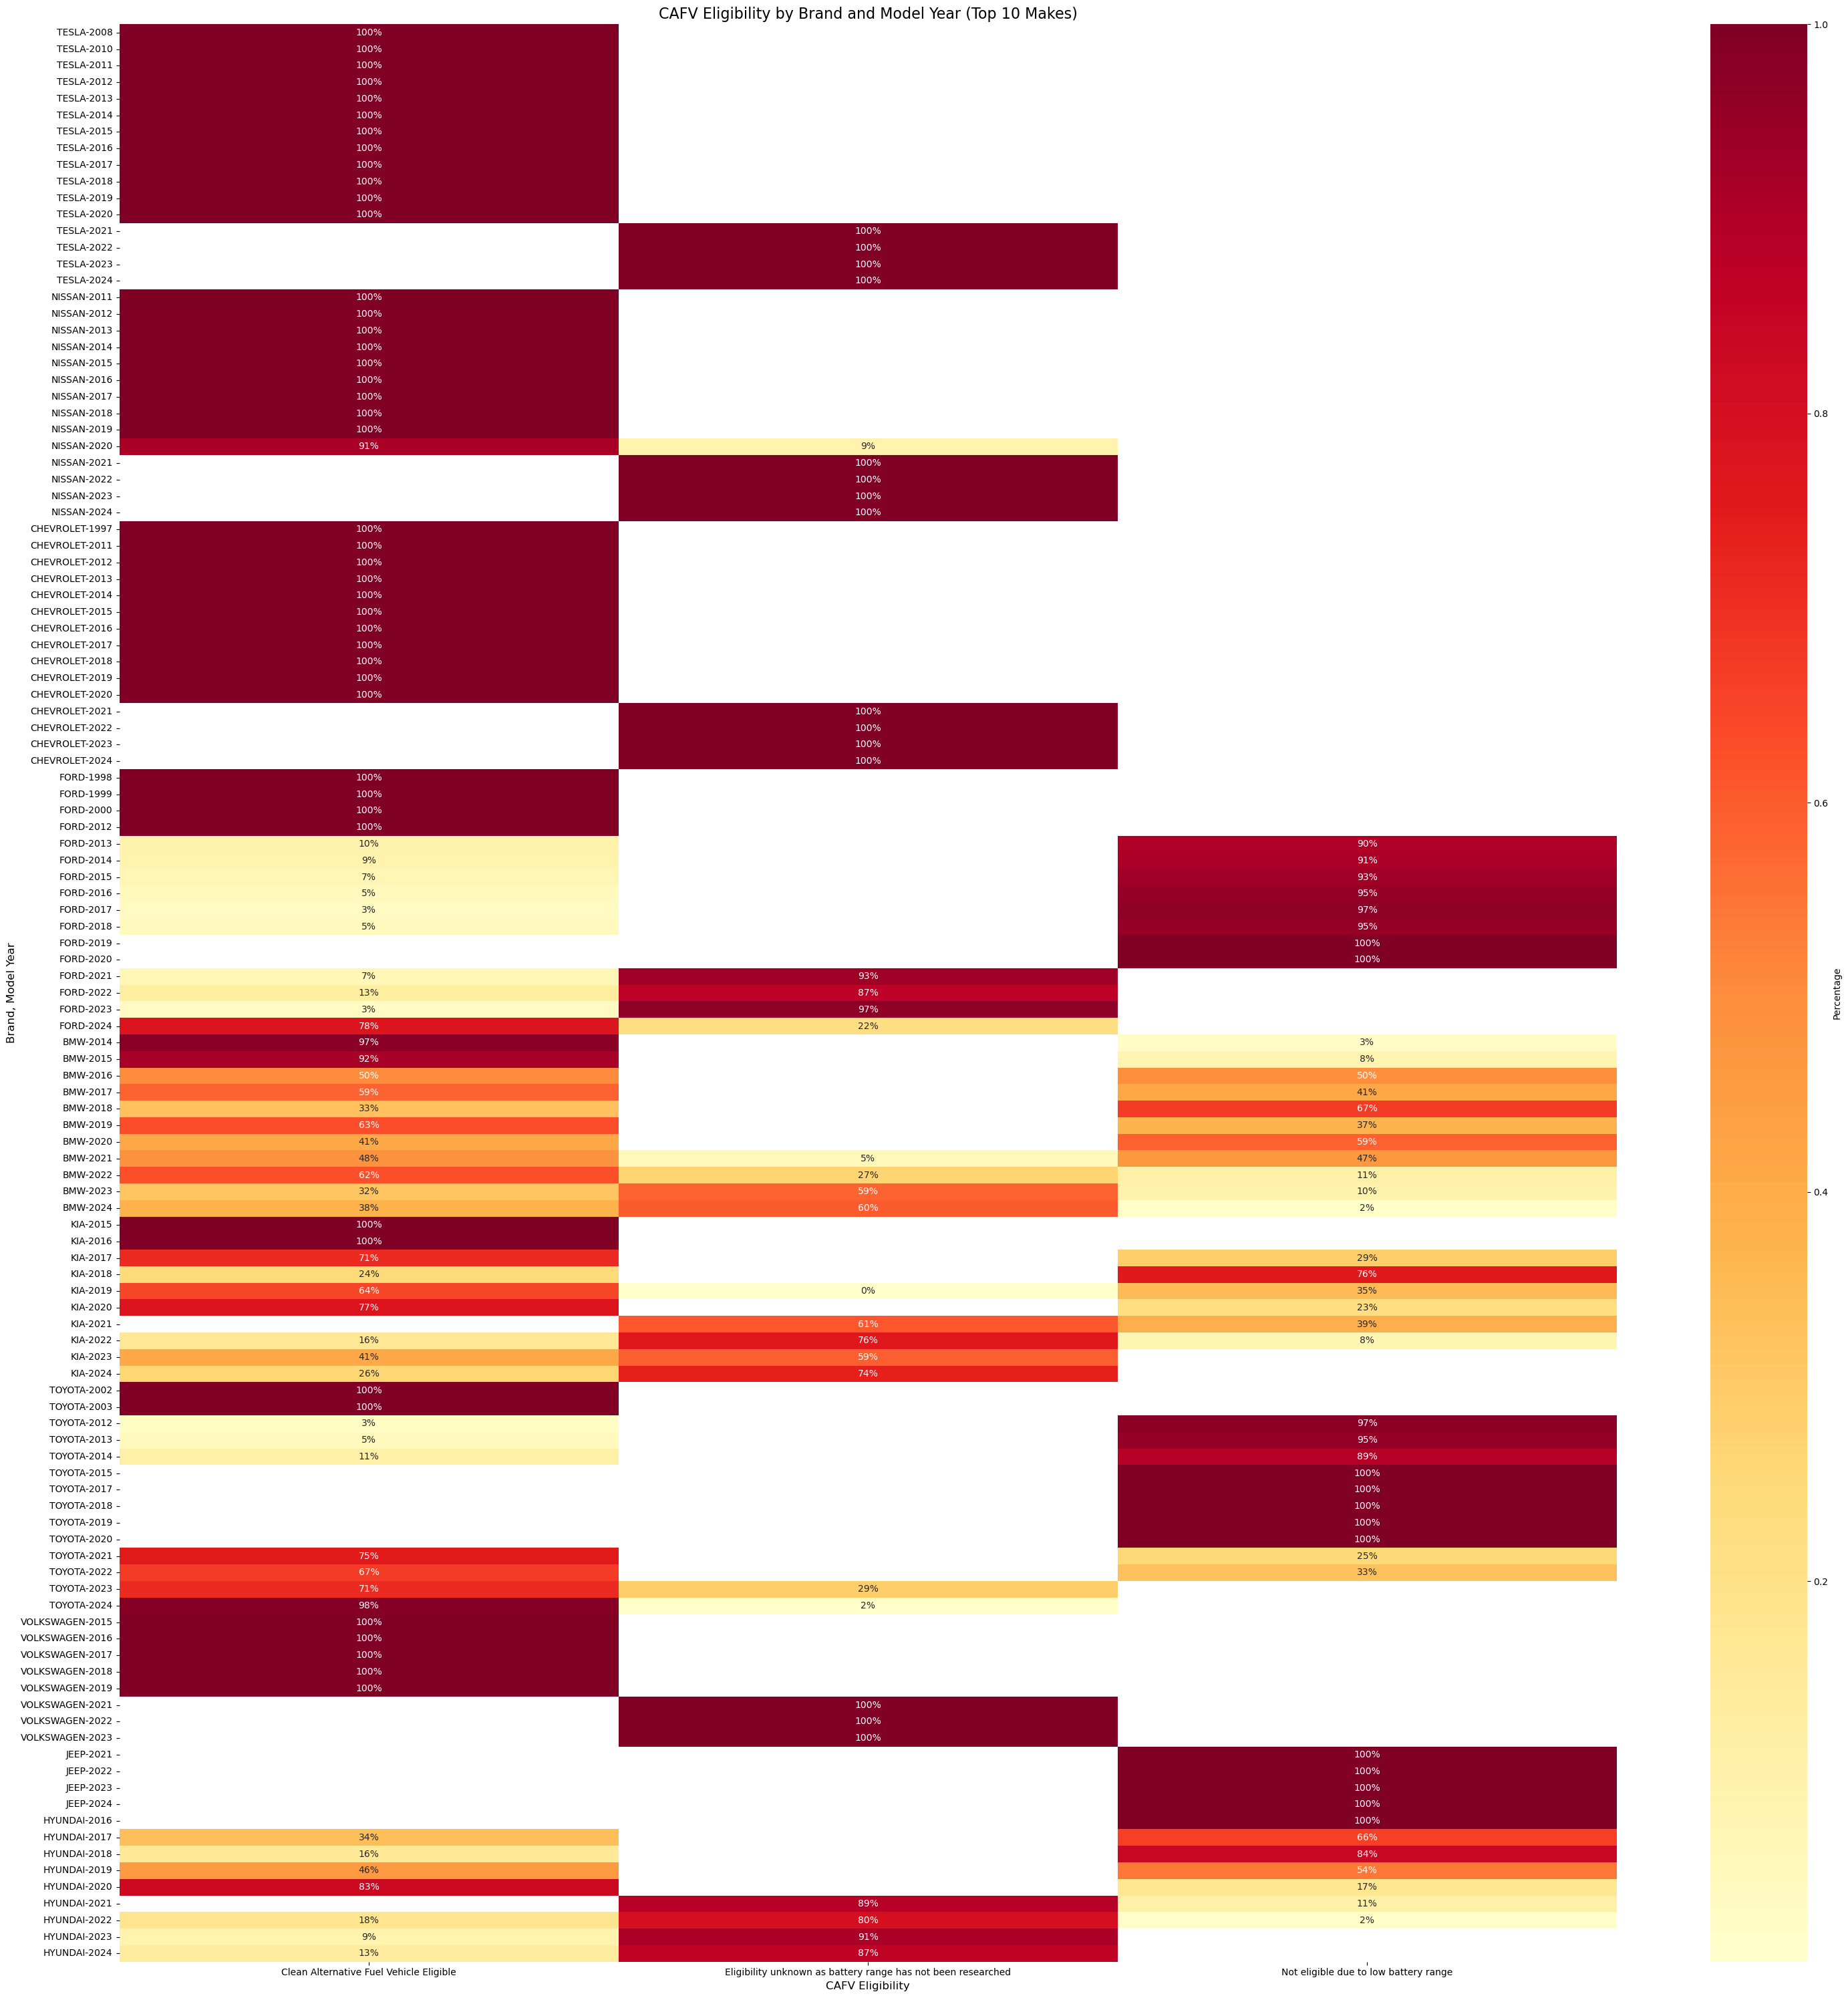

In [9]:
grouped = MAIN_DATA.groupby(['Brand', 'Model Year'])['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).unstack()

# Picking top 15 to find some correlation
top_makes = MAIN_DATA['Brand'].value_counts().nlargest(10).index
grouped_top = grouped.loc[top_makes]

plt.figure(figsize=(30, 30))
sns.heatmap(grouped_top, annot=True, fmt='.0%', cmap='YlOrRd', cbar_kws={'label': 'Percentage'})
plt.title('CAFV Eligibility by Brand and Model Year (Top 10 Makes)', fontsize=16)
plt.xlabel('CAFV Eligibility', fontsize=12)
plt.ylabel('Brand, Model Year', fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
print("\nCount of each of the unique Electric Utilities:")
electric_utility_counts = MAIN_DATA["Electric Utility"].value_counts()

# Print all values without truncation
pd.set_option('display.max_rows', None)
print(electric_utility_counts)

# Reset display options to default (optional)
pd.reset_option('display.max_rows')


Count of each of the unique Electric Utilities:
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                       67180
PUGET SOUND ENERGY INC                                                                                              36705
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                        32012
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                                    10420
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                      7959
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                                                   4090
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY                                           2846
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                      

## `Finding Co-Relation Matrix`

In [11]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

MAIN_DATA['Model Year'] = pd.to_numeric(MAIN_DATA['Model Year'], errors='coerce')
MAIN_DATA['Electric Range'] = pd.to_numeric(MAIN_DATA['Electric Range'], errors='coerce')

numeric_columns = MAIN_DATA.select_dtypes(include=[np.number]).columns
categorical_columns = MAIN_DATA.select_dtypes(include=['object']).columns

all_columns = list(MAIN_DATA.columns)
corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

for col1 in all_columns:
    for col2 in all_columns:
        if col1 in numeric_columns and col2 in numeric_columns:
            corr_matrix.loc[col1, col2] = MAIN_DATA[col1].corr(MAIN_DATA[col2])
        elif col1 in categorical_columns and col2 in categorical_columns:
            corr_matrix.loc[col1, col2] = cramers_v(MAIN_DATA[col1], MAIN_DATA[col2])
        else:
            if col1 in numeric_columns:
                num_col, cat_col = col1, col2
            else:
                num_col, cat_col = col2, col1
            categories = MAIN_DATA[cat_col].unique()
            cat_means = MAIN_DATA.groupby(cat_col)[num_col].mean()
            overall_mean = MAIN_DATA[num_col].mean()
            between_ss = sum(len(MAIN_DATA[MAIN_DATA[cat_col] == cat]) * (mean - overall_mean)**2 for cat, mean in cat_means.items())
            total_ss = sum((MAIN_DATA[num_col] - overall_mean)**2)
            correlation_ratio = np.sqrt(between_ss / total_ss)
            corr_matrix.loc[col1, col2] = correlation_ratio

corr_matrix = corr_matrix.astype(float)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

# We can adjust this threshold
threshold = 0.8
potential_redundancies = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            potential_redundancies.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("Potential redundancies:")
for col1, col2, corr in potential_redundancies:
    print(f"{col1} and {col2}: Correlation = {corr:.2f}")

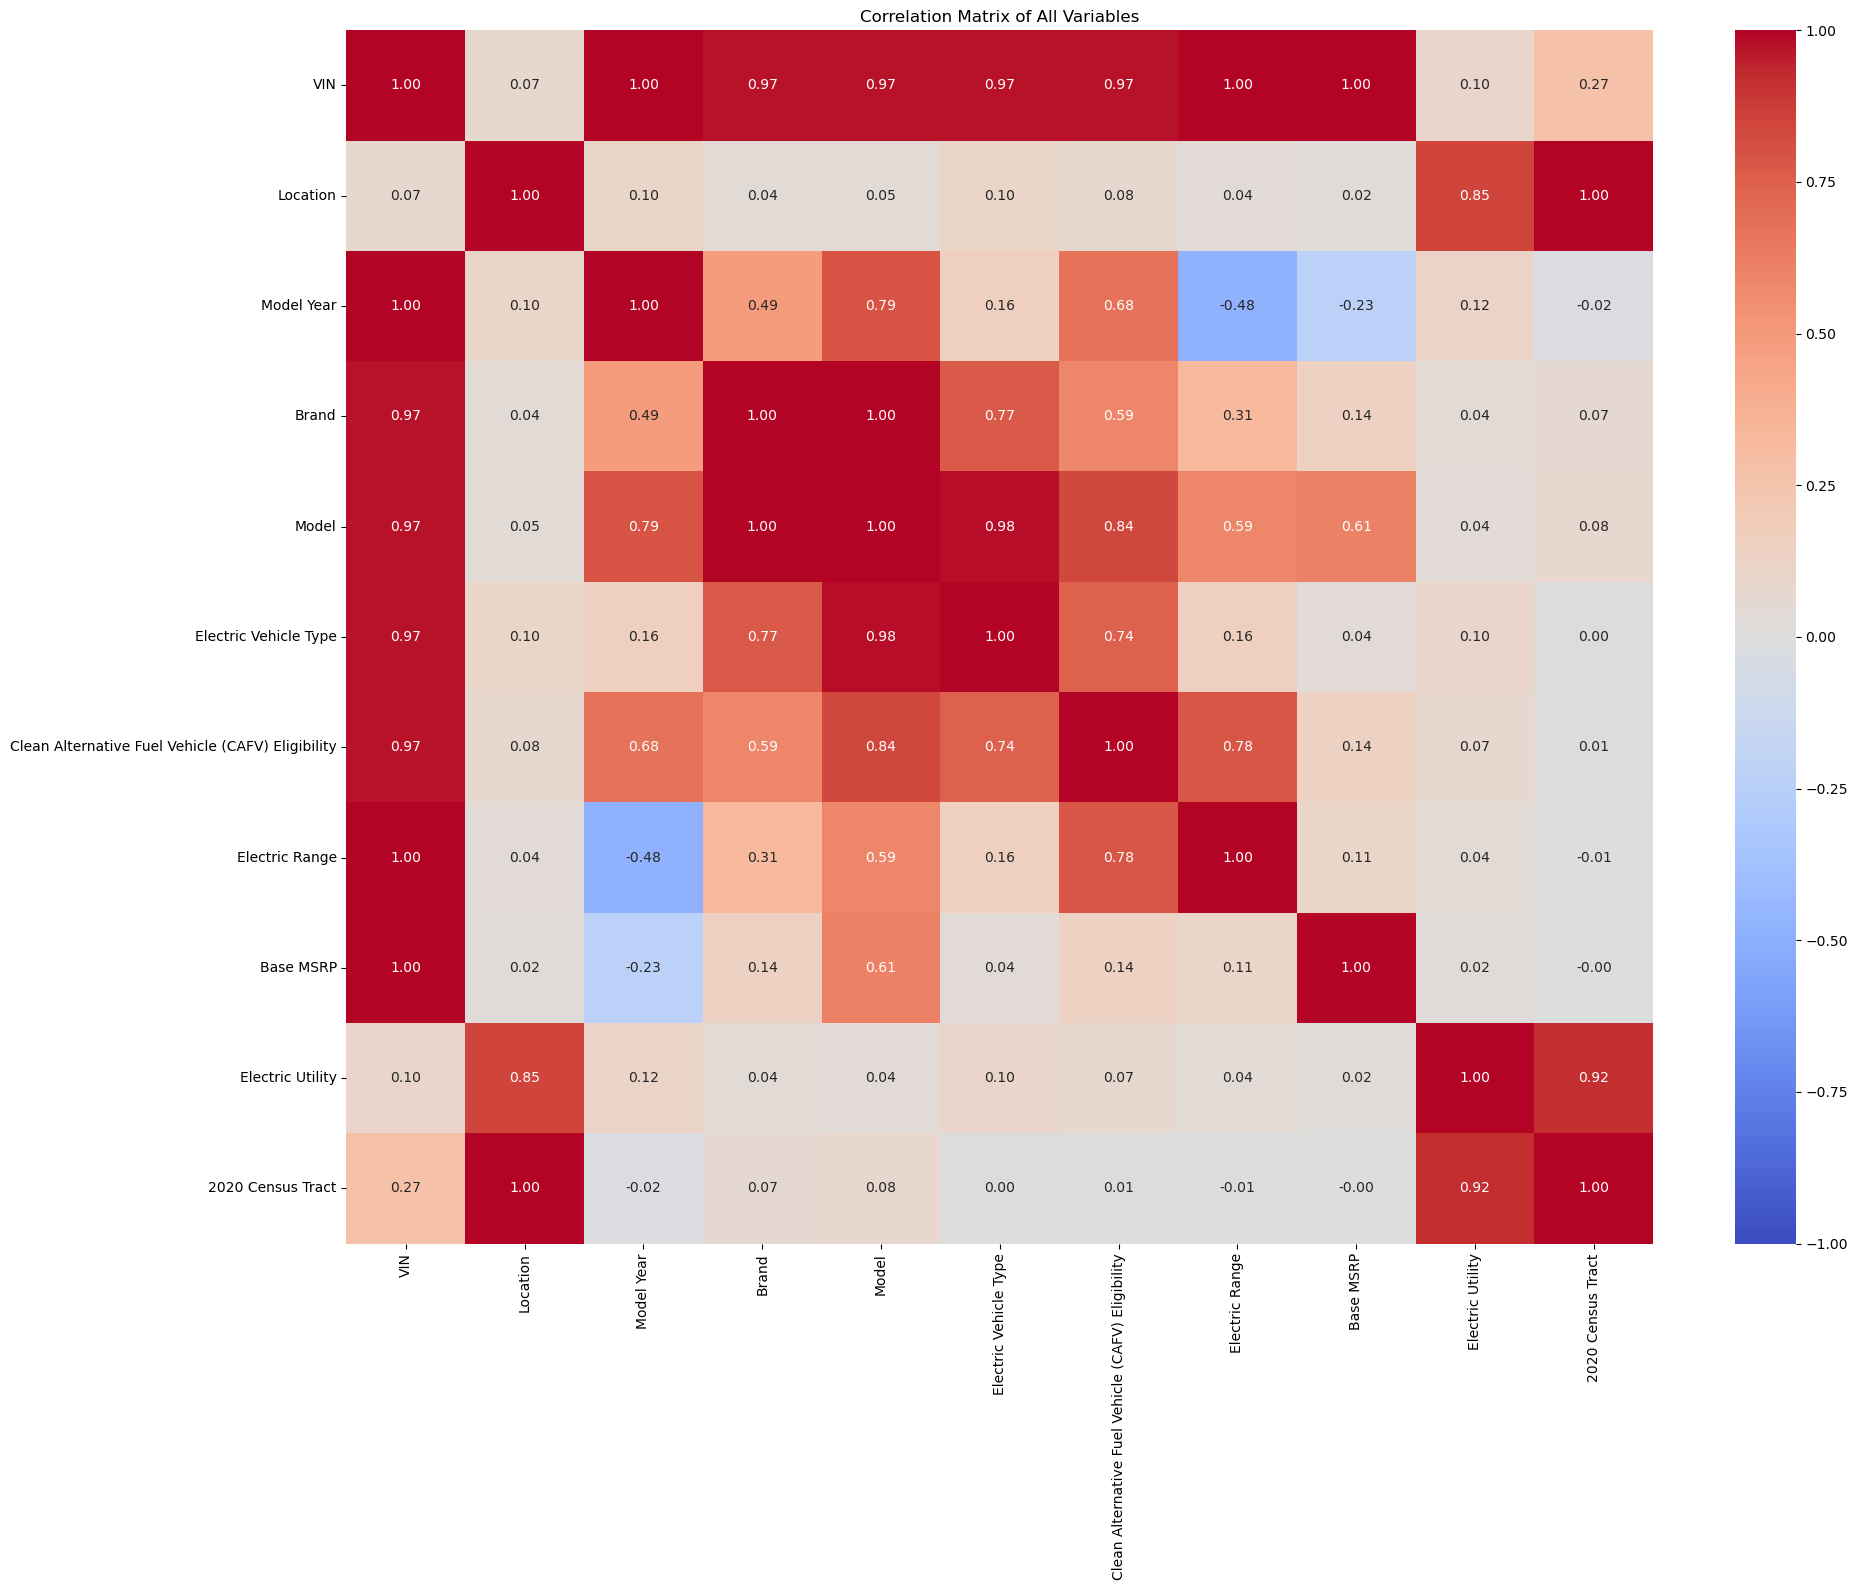

Potential redundancies:

* VIN and Model Year: Correlation = 1.00
* VIN and Brand: Correlation = 0.97
* VIN and Model: Correlation = 0.97
* VIN and Electric Vehicle Type: Correlation = 0.97
* VIN and Clean Alternative Fuel Vehicle (CAFV) Eligibility: Correlation = 0.97
* VIN and Electric Range: Correlation = 1.00
* VIN and Base MSRP: Correlation = 1.00
* Location and Electric Utility: Correlation = 0.85
* Location and 2020 Census Tract: Correlation = 1.00
* Brand and Model: Correlation = 1.00
* Model and Electric Vehicle Type: Correlation = 0.98
* Model and Clean Alternative Fuel Vehicle (CAFV) Eligibility: Correlation = 0.84
* Electric Utility and 2020 Census Tract: Correlation = 0.92

### Inferences:
* As we can see from the correlation matrix, the columns Model and Electric Vehicle type have approximately 1 correlation and thus can be ignored by dropping the Model column. 

In [12]:
# Dropping Latitude Longitude data as its of no use (redundant)
print("-> Dropping Model data as its of no use (redundant & not generalisable)!")
MAIN_DATA.drop(columns=["Model"], inplace=True)

# Making new file for MAIN_DATA (FINAL PRE-PROCESSED DATA)
MAIN_DATA.to_csv("MAIN_DATA.csv")

-> Dropping Model data as its of no use (redundant & not generalisable)!


### County Generalization

In [13]:
washington_counties = {
    "North": ["Whatcom", "Skagit", "San Juan", "Island", "Snohomish", "Okanogan"],
    "South": ["Clark", "Cowlitz", "Lewis", "Skamania", "Klickitat", "Yakima", "Pierce"],
    "East": [
        "Spokane",
        "Stevens",
        "Pend Oreille",
        "Ferry",
        "Lincoln",
        "Whitman",
        "Garfield",
        "Columbia",
        "Walla Walla",
        "Franklin",
        "Adams",
        "Grant",
        "Douglas",
        "Chelan",
        "Kittitas",
        "Benton",
        "Asotin",
    ],
    "West": [
        "Clallam",
        "Jefferson",
        "Grays Harbor",
        "Mason",
        "Thurston",
        "Pacific",
        "Wahkiakum",
        "Kitsap",
        "King",
    ],
}


county_to_direction = {}
for direction, counties in washington_counties.items():
    for county in counties:
        county_to_direction[county] = direction

MAIN_DATA['Cardinal Direction'] = MAIN_DATA['Location'].map(county_to_direction)

### Brand Generalization

In [14]:
# Region-based categorization
car_brands_by_region = {
    "North America": [
        "CHEVROLET", "FORD", "CHRYSLER", "CADILLAC", "LINCOLN", "TESLA", "RIVIAN",
        "JEEP", "DODGE", "GMC", "FISKER", "LUCID"
    ],
    "Europe": [
        "AUDI", "VOLVO", "FIAT", "BMW", "VOLKSWAGEN", "SMART", "MINI", "MERCEDES-BENZ",
        "PORSCHE", "JAGUAR", "POLESTAR", "LAND ROVER", "TH!NK", "ALFA ROMEO", "BENTLEY",
        "ROLLS ROYCE"
    ],
    "Asia": [
        "KIA", "NISSAN", "TOYOTA", "HONDA", "LEXUS", "MAZDA", "MITSUBISHI", "HYUNDAI",
        "GENESIS", "SUBARU"
    ],
    "Other": ["AZURE DYNAMICS", "WHEEGO ELECTRIC CARS"]
}

# Market position categorization
car_brands_by_market = {
    "Luxury": [
        "AUDI", "BMW", "LEXUS", "CADILLAC", "MERCEDES-BENZ", "PORSCHE", "JAGUAR",
        "LAND ROVER", "BENTLEY", "ROLLS ROYCE", "GENESIS", "LUCID"
    ],
    "Mass Market": [
        "CHEVROLET", "KIA", "NISSAN", "TOYOTA", "FORD", "CHRYSLER", "VOLKSWAGEN",
        "HONDA", "MAZDA", "MITSUBISHI", "HYUNDAI", "DODGE", "SUBARU", "FIAT", "JEEP", "GMC"
    ],
    "Electric Specialists": [
        "TESLA", "RIVIAN", "POLESTAR", "FISKER", "TH!NK", "WHEEGO ELECTRIC CARS",
        "AZURE DYNAMICS"
    ],
    "Performance/Premium": ["VOLVO", "ALFA ROMEO", "MINI"],
    "Ultra-Luxury": ["BENTLEY", "ROLLS ROYCE"]
}

car_brands_by_country = {
    "USA": [
        "FORD", "TESLA", "CHEVROLET", "CHRYSLER", "CADILLAC", "LINCOLN", "RIVIAN",
        "JEEP", "DODGE", "GMC", "FISKER", "LUCID"
    ],
    "Germany": [
        "AUDI", "BMW", "MERCEDES-BENZ", "VOLKSWAGEN", "PORSCHE", "MINI", "SMART"
    ],
    "Japan": [
        "HONDA", "TOYOTA", "NISSAN", "MAZDA", "MITSUBISHI", "SUBARU", "LEXUS"
    ],
    "South Korea": [
        "HYUNDAI", "KIA", "GENESIS"
    ],
    "UK": [
        "JAGUAR", "LAND ROVER", "ROLLS ROYCE", "BENTLEY"
    ],
    "Sweden": [
        "VOLVO", "POLESTAR"
    ],
    "Italy": [
        "FIAT", "ALFA ROMEO"
    ],
    "India": [
        "TATA"
    ],
    "Other": ["AZURE DYNAMICS", "WHEEGO ELECTRIC CARS"]
}



brand_to_region = {brand: region for region, brands in car_brands_by_region.items() for brand in brands}
brand_to_market = {brand: market for market, brands in car_brands_by_market.items() for brand in brands}
brand_to_country = {brand: country for country, brands in car_brands_by_country.items() for brand in brands}

MAIN_DATA['Brand Region'] = MAIN_DATA['Brand'].map(brand_to_region)
MAIN_DATA['Market Position'] = MAIN_DATA['Brand'].map(brand_to_market)
MAIN_DATA['Brand Country'] = MAIN_DATA['Brand'].map(brand_to_country)

### Brand Year Generalization

In [15]:
MAIN_DATA['Model Year'] = pd.to_numeric(MAIN_DATA['Model Year'], errors='coerce')

def categorize_year(year):
    if pd.isna(year):
        return 'Unknown'
    elif 1997 <= year <= 2011:
        return 'Early EV Era (1997-2011)'
    elif 2012 <= year <= 2020:
        return 'EV Growth Era (2012-2020)'
    elif 2021 <= year <= 2024:
        return 'Recent EV Era (2021-2024)'
    else:
        return 'Other'

MAIN_DATA['Model Year Category'] = MAIN_DATA['Model Year'].apply(categorize_year)

### Electric Utility Generalization

In [16]:
def simplified_categorize_utility(utility_string):
    if "NO KNOWN ELECTRIC UTILITY SERVICE" in utility_string:
        return "No Service"
    elif "BONNEVILLE POWER ADMINISTRATION" in utility_string:
        return "Federal/Regional"
    elif any(private in utility_string for private in ["PUGET SOUND ENERGY INC", "PACIFICORP", "AVISTA CORP", "PORTLAND GENERAL ELECTRIC CO"]):
        return "Private Utility"
    elif any(public in utility_string for public in ["PUD", "CITY OF", "TOWN OF"]):
        return "Public Utility"
    else:
        return "Other"

MAIN_DATA['Simplified Utility Category'] = MAIN_DATA['Electric Utility'].apply(simplified_categorize_utility)

## `Setting Final Pre-Processed Data`

In [17]:
# Making new file for MAIN_DATA (FINAL PRE-PROCESSED DATA)
MAIN_DATA.to_csv("MAIN_DATA.csv")

## `Grouping by Brands`

In [18]:
# Group the data by Brand and Electric Vehicle Type, and count occurrences
grouped = MAIN_DATA.groupby(["Brand", "Electric Vehicle Type"]).size().reset_index(name="Count")

# Calculate the total count for each brand
brand_totals = grouped.groupby("Brand")["Count"].sum().reset_index(name="Total")

# Merge the grouped data with brand totals
result = pd.merge(grouped, brand_totals, on="Brand")

# Calculate the percentage
result["Percentage"] = (result["Count"] / result["Total"] * 100).round(2)

# Filter for only PHEV and BEV types
result = result[result["Electric Vehicle Type"].isin(["Plug-in Hybrid Electric Vehicle (PHEV)", "Battery Electric Vehicle (BEV)"])]

# Filter for brands with 100% of either PHEV or BEV
result = result[result["Percentage"] == 100]

# Sort the result by Brand and Electric Vehicle Type
result = result.sort_values(["Brand", "Electric Vehicle Type"])

# Reset the index to ensure proper alignment
result = result.reset_index(drop=True)

# manage display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Display the result
print(result)

                   Brand                   Electric Vehicle Type  Count  Total  Percentage
0             ALFA ROMEO  Plug-in Hybrid Electric Vehicle (PHEV)     42     42       100.0
1         AZURE DYNAMICS          Battery Electric Vehicle (BEV)      8      8       100.0
2                BENTLEY  Plug-in Hybrid Electric Vehicle (PHEV)      3      3       100.0
3               CHRYSLER  Plug-in Hybrid Electric Vehicle (PHEV)   3039   3039       100.0
4                  DODGE  Plug-in Hybrid Electric Vehicle (PHEV)    607    607       100.0
5                   FIAT          Battery Electric Vehicle (BEV)    783    783       100.0
6                GENESIS          Battery Electric Vehicle (BEV)    189    189       100.0
7                    GMC          Battery Electric Vehicle (BEV)      3      3       100.0
8                 JAGUAR          Battery Electric Vehicle (BEV)    236    236       100.0
9                   JEEP  Plug-in Hybrid Electric Vehicle (PHEV)   4678   4678       100.0

B(ALFA ROMEO) ∨ B(BENTLEY) ∨ B(CHRYSLER) ∨ B(DODGE) ∨ B(JEEP) ∨ B(LAND ROVER) ∨ B(LINCOLN) ∨ B(WHEEGO ELECTRIC CARS) → PHEV(x)\
`&`\
B(AZURE) ∨ B(FIAT) ∨ B(GENESIS) ∨ B(GMC) ∨ B(JAGUAR) ∨ B(LUCID) ∨ B(NISSAN) ∨ B(POLESTAR) ∨ B(RIVIAN) ∨ B(ROLLS ROYCE) ∨ B(SMART) ∨ B(TESLA) ∨ B(TH!NK) ∨ B(VOLKSWAGEN) → BEV(x)

## `Grouping by Brand Countries`

In [19]:
# Group the data by Brand Country and Electric Vehicle Type, and count occurrences
grouped = MAIN_DATA.groupby(["Brand Country", "Electric Vehicle Type"]).size().reset_index(name="Count")

# Calculate the total count for each brand country
country_totals = grouped.groupby("Brand Country")["Count"].sum().reset_index(name="Total")

# Merge the grouped data with country totals
result = pd.merge(grouped, country_totals, on="Brand Country")

# Calculate the percentage
result["Percentage"] = (result["Count"] / result["Total"] * 100).round(2)

# Filter for only BEV type
result = result[result["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"]

# Function to categorize based on BEV percentage
def categorize_ev_market(bev_percentage):
    if bev_percentage > 65:
        return "BEV Dominant"
    elif 35 <= bev_percentage <= 65:
        return "Mixed EV Market"
    else:
        return "PHEV Dominant"

# Apply categorization
result["Market Category"] = result["Percentage"].apply(categorize_ev_market)

# Sort the result by Brand Country
result = result.sort_values("Brand Country")

# Reset the index to ensure proper alignment
result = result.reset_index(drop=True)

# Display the result
print(result)

  Brand Country           Electric Vehicle Type   Count   Total  Percentage  Market Category
0       Germany  Battery Electric Vehicle (BEV)   12993   20545       63.24  Mixed EV Market
1         Italy  Battery Electric Vehicle (BEV)     783     825       94.91     BEV Dominant
2         Japan  Battery Electric Vehicle (BEV)   15434   24063       64.14  Mixed EV Market
3         Other  Battery Electric Vehicle (BEV)       8      11       72.73     BEV Dominant
4   South Korea  Battery Electric Vehicle (BEV)    9276   12373       74.97     BEV Dominant
5        Sweden  Battery Electric Vehicle (BEV)    2348    5172       45.40  Mixed EV Market
6            UK  Battery Electric Vehicle (BEV)     237     297       79.80     BEV Dominant
7           USA  Battery Electric Vehicle (BEV)  100621  117764       85.44     BEV Dominant


C(Italy) ∨ C(Other) ∨ C(South Korea) ∨ C(UK) ∨ C(USA) → BEVDominant\
`&`\
C(Germany) ∨ C(Japan) ∨ C(Sweden) → MixedEVMarket

## `Grouping by Brand Regions`

In [29]:
import pandas as pd

# Assuming MAIN_DATA is already defined

# Group the data by Brand Region and Electric Vehicle Type, and count occurrences
grouped = (
    MAIN_DATA.groupby(["Brand Region", "Electric Vehicle Type"])
    .size()
    .reset_index(name="Count")
)

# Calculate the total count for each brand region
region_totals = grouped.groupby("Brand Region")["Count"].sum().reset_index(name="Total")

# Merge the grouped data with region totals
result = pd.merge(grouped, region_totals, on="Brand Region")

# Calculate the percentage
result["Percentage"] = (result["Count"] / result["Total"] * 100).round(2)

# Filter for only PHEV and BEV types
result = result[
    result["Electric Vehicle Type"].isin(
        ["Plug-in Hybrid Electric Vehicle (PHEV)", "Battery Electric Vehicle (BEV)"]
    )
]


# Function to categorize based on BEV percentage
def categorize_ev_market(bev_percentage):
    if bev_percentage > 60:
        return "BEV Dominant"
    elif 40 <= bev_percentage <= 60:
        return "Mixed EV Market"
    else:
        return "PHEV Dominant"


# Create a DataFrame with BEV percentages
bev_percentages = result[
    result["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"
].set_index("Brand Region")["Percentage"]

# Apply categorization
categories = bev_percentages.apply(categorize_ev_market)

# Add the category back to the main result DataFrame
result = result.merge(
    categories.rename("Market Category"),
    left_on="Brand Region",
    right_index=True,
    how="left",
)

# Sort the result by Brand Region and Electric Vehicle Type
result = result.sort_values(["Brand Region", "Electric Vehicle Type"])

# Reset the index to ensure proper alignment
result = result.reset_index(drop=True)

# Calculate overall percentages
overall_total = result["Count"].sum()
overall_percentages = (
    result.groupby("Electric Vehicle Type")["Count"].sum() / overall_total * 100
)

# Create overall table
overall_table = pd.DataFrame(
    {
        "Brand Region": "All",
        "Electric Vehicle Type": overall_percentages.index,
        "Count": result.groupby("Electric Vehicle Type")["Count"].sum().values,
        "Total": overall_total,
        "Percentage": overall_percentages.values.round(2),
    }
)

# Categorize overall market
overall_bev_percentage = overall_table.loc[
    overall_table["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)",
    "Percentage",
].values[0]
overall_category = categorize_ev_market(overall_bev_percentage)

# Add overall category to the table
overall_table["Market Category"] = overall_category

# Reorder columns to match the result DataFrame
overall_table = overall_table[
    [
        "Brand Region",
        "Electric Vehicle Type",
        "Count",
        "Total",
        "Percentage",
        "Market Category",
    ]
]

# Display the results
print("EV Market by Brand Region:")
print(result)
print("\nOverall EV Market:")

overall_table

EV Market by Brand Region:
    Brand Region                   Electric Vehicle Type   Count   Total  Percentage Market Category
0           Asia          Battery Electric Vehicle (BEV)   24710   36436       67.82    BEV Dominant
1           Asia  Plug-in Hybrid Electric Vehicle (PHEV)   11726   36436       32.18    BEV Dominant
2         Europe          Battery Electric Vehicle (BEV)   16366   26844       60.97    BEV Dominant
3         Europe  Plug-in Hybrid Electric Vehicle (PHEV)   10478   26844       39.03    BEV Dominant
4  North America          Battery Electric Vehicle (BEV)  100621  117764       85.44    BEV Dominant
5  North America  Plug-in Hybrid Electric Vehicle (PHEV)   17143  117764       14.56    BEV Dominant
6          Other          Battery Electric Vehicle (BEV)       8      11       72.73    BEV Dominant
7          Other  Plug-in Hybrid Electric Vehicle (PHEV)       3      11       27.27    BEV Dominant

Overall EV Market:


Brand Region                   Electric Vehicle Type   Count   Total  Percentage Market Category
0          All          Battery Electric Vehicle (BEV)  141705  181055       78.27    BEV Dominant
1          All  Plug-in Hybrid Electric Vehicle (PHEV)   39350  181055       21.73    BEV Dominant

R(Asia) ∨ R(Europe) ∨ R(North America) ∨ R(Other) ∨ All
→ BEV Dominant

## `Getting Electric Range for CAFV Eligibility`

In [24]:
range_summary = MAIN_DATA.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].agg(['min', 'max'])
print("Min and Max Electric Range by CAFV Eligibility:")
range_summary

Min and Max Electric Range by CAFV Eligibility:


min  max
Clean Alternative Fuel Vehicle (CAFV) Eligibility           
Clean Alternative Fuel Vehicle Eligible              30  337
Eligibility unknown as battery range has not be...    0    0
Not eligible due to low battery range                 6   29

(ER(>=30) ^ ER(<=337)) → CAFV Eligible\
^\
(ER(>=6) ^ ER(<=29)) → Not Eligible

## `Grouping by Brand Country for CAFV Eligibility`

In [37]:
# Create a boolean mask for CAFV eligibility
MAIN_DATA['Is_CAFV_Eligible'] = MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'

# Group by Brand Country and CAFV Eligibility
grouped = MAIN_DATA.groupby(['Brand Country', 'Is_CAFV_Eligible'])

# Count the number of vehicles in each group
counts = grouped.size().unstack(fill_value=0)

# Calculate the total number of vehicles for each brand country
totals = counts.sum(axis=1)

# Calculate percentages
percentages = counts.div(totals, axis=0) * 100

# Rename columns for clarity
percentages.columns = ['Not CAFV Eligible (%)', 'CAFV Eligible (%)']

# Reset index to make Brand Country a column
result = percentages.reset_index()

# Filter rows where either percentage is 100%
result_filtered = result[(result['CAFV Eligible (%)'] == 100) | (result['Not CAFV Eligible (%)'] == 100)]

# Sort by CAFV Eligible percentage in descending order
result_filtered = result_filtered.sort_values('CAFV Eligible (%)', ascending=False)

# Display the filtered result
print("Countries with 100% CAFV Eligible or 100% Not CAFV Eligible vehicles:")
print(result_filtered)

# Optionally, save the filtered result to a CSV file
result_filtered.to_csv('cafv_eligibility_by_country_100percent.csv', index=False)

# Additional analysis: Overall percentage of CAFV Eligible vehicles
total_vehicles = len(MAIN_DATA)
cafv_eligible_count = MAIN_DATA['Is_CAFV_Eligible'].sum()
overall_cafv_percentage = (cafv_eligible_count / total_vehicles) * 100

Countries with 100% CAFV Eligible or 100% Not CAFV Eligible vehicles:
  Brand Country  Not CAFV Eligible (%)  CAFV Eligible (%)
1         Italy                    0.0              100.0
3         Other                    0.0              100.0


C(Italy) ∨ C(Other) → CAFV Eligible

## `Grouping by Model Year Category for CAFV Aggregates`

In [45]:
filtered_data = MAIN_DATA[~MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('Eligibility unknown', na=False)]

def agg_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

# Group the data
grouped_data = filtered_data.groupby(['Model Year Category', 'Brand Region'])['Electric Range'].agg([
    ('Mean', 'mean'),
    ('Mode', agg_mode)
]).reset_index()

# Round numeric columns
for col in ['Mean', 'Mode']:
    grouped_data[col] = grouped_data[col].round(2)

# Define the custom order for Model Year Category
model_year_order = ['Early EV Era (1997-2011)', 'EV Growth Era (2012-2020)', 'Recent EV Era (2021-2024)']

# Create a categorical column with the custom order
grouped_data['Model Year Category'] = pd.Categorical(grouped_data['Model Year Category'], categories=model_year_order, ordered=True)

# Define function to categorize CAFV Density
def categorize_cafv_density(row):
    mean, mode = row['Mean'], row['Mode']
    if abs(mean - mode) <= 20:
        if (mean > 50 or mode > 50):
            return "Majorly CAFV"
        else:
            return "Sparsely CAFV"
    else:
        return "Mixed CAFV"

# Apply the categorization
grouped_data['CAFV Density'] = grouped_data.apply(categorize_cafv_density, axis=1)

# Sort the dataframe
final_df = grouped_data.sort_values(['Model Year Category', 'Brand Region'])

# Rename columns for clarity
final_df = final_df.rename(columns={
    'Model Year Category': 'Brand Year Category'
})

# Reorder columns as requested
final_df = final_df[['Brand Year Category', 'Brand Region', 'Mean', 'Mode', 'CAFV Density']]

final_df

Brand Year Category   Brand Region    Mean  Mode   CAFV Density
4    Early EV Era (1997-2011)           Asia   73.10    73   Majorly CAFV
5    Early EV Era (1997-2011)         Europe  100.00   100   Majorly CAFV
6    Early EV Era (1997-2011)  North America  107.24    35     Mixed CAFV
7    Early EV Era (1997-2011)          Other   72.50    56   Majorly CAFV
0   EV Growth Era (2012-2020)           Asia   89.53    84   Majorly CAFV
1   EV Growth Era (2012-2020)         Europe   71.86    14     Mixed CAFV
2   EV Growth Era (2012-2020)  North America  191.52   215     Mixed CAFV
3   EV Growth Era (2012-2020)          Other   56.00    56   Majorly CAFV
8   Recent EV Era (2021-2024)           Asia   35.32    42  Sparsely CAFV
9   Recent EV Era (2021-2024)         Europe   43.21    30  Sparsely CAFV
10  Recent EV Era (2021-2024)  North America   26.36    21  Sparsely CAFV

> (BYC(Early EV) ^ (BR(Asia) ∨ BR(Europe) ∨ BR(Other))) → Majorly CAFV\
> `&`\
> (BYC(Early EV) ^ BR(North America)) → Mixed CAFV

> (BYC(EV Growth) ^ (BR(Asia) ∨ BR(Other))) → Majorly CAFV\
> `&`\
> (BYC(EV Growth) ^ (BR(North America) ∨ BR(Europe))) → Mixed CAFV

> (BYC(Recent EV) ^ BR(ALL)) → Sparsely CAFV

## `Grouping by Model Years for Vehicle Type`

In [21]:
grouped = (
    MAIN_DATA.groupby(["Model Year Category", "Electric Vehicle Type"])
    .size()
    .reset_index(name="Count")
)

vehicle_type_totals = grouped.groupby("Electric Vehicle Type")["Count"].sum().reset_index(name="Total")
result = pd.merge(grouped, vehicle_type_totals, on="Electric Vehicle Type")
result["Percentage"] = (result["Count"] / result["Total"] * 100).round(2)

result = result.sort_values(
    ["Electric Vehicle Type", "Percentage", "Total", "Model Year Category"],
    ascending=[False, False, False, True]
)

result

Model Year Category                   Electric Vehicle Type  Count   Total  Percentage
5  Recent EV Era (2021-2024)  Plug-in Hybrid Electric Vehicle (PHEV)  19885   39350       50.53
3  EV Growth Era (2012-2020)  Plug-in Hybrid Electric Vehicle (PHEV)  19388   39350       49.27
4   Early EV Era (1997-2011)  Plug-in Hybrid Electric Vehicle (PHEV)     77   39350        0.20
2  Recent EV Era (2021-2024)          Battery Electric Vehicle (BEV)  95043  141705       67.07
0  EV Growth Era (2012-2020)          Battery Electric Vehicle (BEV)  45909  141705       32.40
1   Early EV Era (1997-2011)          Battery Electric Vehicle (BEV)    753  141705        0.53

## `Grouping by Cardinal Direction of Counties for Top Brands`

In [22]:
brand_counts = MAIN_DATA.groupby(['Cardinal Direction', 'Brand']).size().reset_index(name='Count')

direction_totals = brand_counts.groupby('Cardinal Direction')['Count'].sum().reset_index(name='Direction_Total')

brand_counts_with_totals = pd.merge(brand_counts, direction_totals, on='Cardinal Direction')

brand_counts_with_totals['Percentage'] = (brand_counts_with_totals['Count'] / brand_counts_with_totals['Direction_Total'] * 100).round(2)

top_brands = (brand_counts_with_totals.sort_values(['Cardinal Direction', 'Count'], ascending=[True, False])
              .groupby('Cardinal Direction')
              .head(3)
              .reset_index(drop=True))

top_brands = top_brands.sort_values(['Cardinal Direction', 'Count'], ascending=[True, False])
top_brands

Cardinal Direction      Brand  Count  Direction_Total  Percentage
0                East      TESLA   4538            11399       39.81
1                East  CHEVROLET   1180            11399       10.35
2                East       FORD    879            11399        7.71
3               North      TESLA  14060            30878       45.53
4               North     NISSAN   2829            30878        9.16
5               North  CHEVROLET   2443            30878        7.91
6               South      TESLA  11447            27936       40.98
7               South  CHEVROLET   2375            27936        8.50
8               South     NISSAN   2077            27936        7.43
9                West      TESLA  50582           110842       45.63
10               West     NISSAN   8373           110842        7.55
11               West  CHEVROLET   7840           110842        7.07